In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

Data processing steps

Using Pandas to read csv file

In [2]:
beer_consumption_data = pd.read_csv("./data/consumption.csv")

In [3]:
print(beer_consumption_data)

           Date  T_Media  T_Minima  T_Maxima  Precipitation  Weekend  \
0    2015-01-01    27.30      23.9      32.5            0.0        0   
1    2015-01-02    27.02      24.5      33.5            0.0        0   
2    2015-01-03    24.82      22.4      29.9            0.0        1   
3    2015-01-04    23.98      21.5      28.6            1.2        1   
4    2015-01-05    23.82      21.0      28.3            0.0        0   
5    2015-01-06    23.78      20.1      30.5           12.2        0   
6    2015-01-07    24.00      19.5      33.7            0.0        0   
7    2015-01-08    24.90      19.5      32.8           48.6        0   
8    2015-01-09    28.20      21.9      34.0            4.4        0   
9    2015-01-10    26.76      22.1      34.2            0.0        1   
10   2015-01-11    27.62      22.2      34.8            3.4        1   
11   2015-01-12    25.96      21.4      35.4            0.0        0   
12   2015-01-13    25.52      21.2      34.8            0.8     

In [4]:
data = beer_consumption_data.drop(['Date'], axis=1)

In [5]:
data = data[data.Weekend != 1]

In [6]:
print(data)

     T_Media  T_Minima  T_Maxima  Precipitation  Weekend  Consumption
0      27.30      23.9      32.5            0.0        0       25.461
1      27.02      24.5      33.5            0.0        0       28.972
4      23.82      21.0      28.3            0.0        0       28.900
5      23.78      20.1      30.5           12.2        0       28.218
6      24.00      19.5      33.7            0.0        0       29.732
7      24.90      19.5      32.8           48.6        0       28.397
8      28.20      21.9      34.0            4.4        0       24.886
11     25.96      21.4      35.4            0.0        0       25.743
12     25.52      21.2      34.8            0.8        0       26.990
13     25.96      21.3      34.0            1.6        0       31.825
14     25.86      21.5      32.8            3.0        0       25.724
15     26.50      22.3      32.7            2.0        0       29.938
18     28.22      22.7      36.5            3.7        0       29.265
19     27.68      23

In [7]:
target = data["Consumption"]

In [8]:
input_data = data.drop(['Consumption','Weekend'], axis=1)
input_data = input_data.drop(['T_Media','Precipitation'], axis=1)

In [9]:
print(input_data)

     T_Minima  T_Maxima
0        23.9      32.5
1        24.5      33.5
4        21.0      28.3
5        20.1      30.5
6        19.5      33.7
7        19.5      32.8
8        21.9      34.0
11       21.4      35.4
12       21.2      34.8
13       21.3      34.0
14       21.5      32.8
15       22.3      32.7
18       22.7      36.5
19       23.3      35.6
20       22.7      30.9
21       19.2      26.1
22       18.5      26.1
25       18.9      28.7
26       20.5      28.7
27       20.1      29.9
28       21.5      29.2
29       20.9      26.9
32       20.7      26.5
33       18.0      31.1
34       19.9      23.7
35       19.1      22.9
36       17.9      25.4
39       19.3      30.7
40       20.1      29.0
41       19.9      30.4
..        ...       ...
323      19.6      27.0
326      19.6      23.6
327      19.3      22.6
328      19.3      24.8
329      19.0      27.4
330      17.6      28.4
333      16.7      23.3
334      16.4      25.8
335      18.2      29.4
336      20.2   

In [10]:
print(target)

0      25.461
1      28.972
4      28.900
5      28.218
6      29.732
7      28.397
8      24.886
11     25.743
12     26.990
13     31.825
14     25.724
15     29.938
18     29.265
19     35.127
20     29.130
21     25.795
22     21.784
25     21.520
26     29.972
27     22.603
28     22.696
29     26.845
32     24.097
33     31.655
34     24.738
35     19.950
36     22.821
39     24.062
40     21.137
41     26.805
        ...  
323    20.332
326    21.662
327    21.689
328    25.119
329    25.285
330    28.979
333    20.238
334    24.529
335    30.471
336    28.405
337    29.513
340    23.375
341    27.713
342    27.137
343    22.933
344    30.740
347    28.131
348    28.617
349    21.062
350    24.337
351    27.042
354    24.834
355    26.828
356    26.468
357    31.572
358    26.308
361    26.095
362    22.309
363    20.467
364    22.446
Name: Consumption, Length: 261, dtype: float64


In [11]:
input_tensor = torch.tensor(input_data.values)

In [12]:
print(input_tensor)

tensor([[23.9000, 32.5000],
        [24.5000, 33.5000],
        [21.0000, 28.3000],
        [20.1000, 30.5000],
        [19.5000, 33.7000],
        [19.5000, 32.8000],
        [21.9000, 34.0000],
        [21.4000, 35.4000],
        [21.2000, 34.8000],
        [21.3000, 34.0000],
        [21.5000, 32.8000],
        [22.3000, 32.7000],
        [22.7000, 36.5000],
        [23.3000, 35.6000],
        [22.7000, 30.9000],
        [19.2000, 26.1000],
        [18.5000, 26.1000],
        [18.9000, 28.7000],
        [20.5000, 28.7000],
        [20.1000, 29.9000],
        [21.5000, 29.2000],
        [20.9000, 26.9000],
        [20.7000, 26.5000],
        [18.0000, 31.1000],
        [19.9000, 23.7000],
        [19.1000, 22.9000],
        [17.9000, 25.4000],
        [19.3000, 30.7000],
        [20.1000, 29.0000],
        [19.9000, 30.4000],
        [23.1000, 32.7000],
        [22.5000, 32.1000],
        [18.8000, 27.3000],
        [19.7000, 28.0000],
        [19.9000, 26.4000],
        [19.9000, 28

In [13]:
target_tensor = torch.tensor(target.values)

In [14]:
w = torch.randn(2,dtype=torch.double,requires_grad=True)
b = torch.randn(1, dtype=torch.double,requires_grad=True)
print(w)
print(b)

tensor([-0.7783, -0.0392], dtype=torch.float64, requires_grad=True)
tensor([1.5377], dtype=torch.float64, requires_grad=True)


In [15]:
def model(x):
    return x @ w.t() + b

In [16]:
preds = model(input_tensor)
print(preds)

tensor([-18.3372, -18.8433, -15.9155, -15.3012, -14.9596, -14.9244, -16.8393,
        -16.5050, -16.3259, -16.3723, -16.4810, -17.0997, -17.5599, -17.9916,
        -17.3405, -14.4284, -13.8836, -14.2968, -15.5420, -15.2777, -16.3399,
        -15.7828, -15.6115, -13.6903, -14.8791, -14.2252, -13.3891, -14.6864,
        -15.2425, -15.1417, -17.7224, -17.2319, -14.1641, -14.8920, -14.9849,
        -15.0672, -16.4564, -15.8035, -15.6674, -14.6316, -14.5929, -15.5700,
        -12.9932, -14.7951, -14.3673, -15.0330, -14.6781, -14.7078, -16.0163,
        -15.2072, -14.4597, -15.0706, -14.0907, -13.9418, -14.7392, -14.4676,
        -14.2772, -12.6842, -13.0353, -12.8645, -13.8729, -13.6786, -14.2649,
        -15.2425, -14.4832, -13.6540, -12.2144, -13.9462, -11.7766, -10.8555,
        -11.8404, -12.6926, -13.5566, -13.9115, -13.9345, -13.9849, -13.8410,
        -14.6277, -14.6198, -14.0186, -13.9144, -14.5846, -13.0582, -12.9031,
        -12.4272, -10.6361,  -9.7536, -13.2677, -12.1971, -11.63

In [17]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [18]:
loss = mse(preds, target_tensor)
print(loss)

tensor(1410.7351, dtype=torch.float64, grad_fn=<DivBackward0>)


In [19]:
loss.backward()

In [20]:
print(w)
print(w.grad)

tensor([-0.7783, -0.0392], dtype=torch.float64, requires_grad=True)
tensor([-1329.0279, -2025.8630], dtype=torch.float64)


In [21]:
print(b)
print(b.grad)

tensor([1.5377], dtype=torch.float64, requires_grad=True)
tensor([-74.3606], dtype=torch.float64)


In [22]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [23]:
print(w)

tensor([-0.7650, -0.0189], dtype=torch.float64, requires_grad=True)


In [24]:
preds = model(input_tensor)
loss = mse(preds, target_tensor)
print(loss)

tensor(1352.5900, dtype=torch.float64, grad_fn=<DivBackward0>)


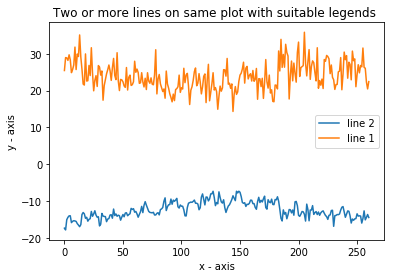

In [25]:
pred_line = preds.detach().numpy()
target_line =  target_tensor.detach().numpy()
plt.plot(pred_line,  label = "line 2")
plt.plot(target_line,  label = "line 1")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [26]:
for i in range(300):
    preds = model(input_tensor)
    loss = mse(preds, target_tensor)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [27]:
preds = model(input_tensor)
loss = mse(preds, target_tensor)
print(loss)

tensor(6.2898, dtype=torch.float64, grad_fn=<DivBackward0>)


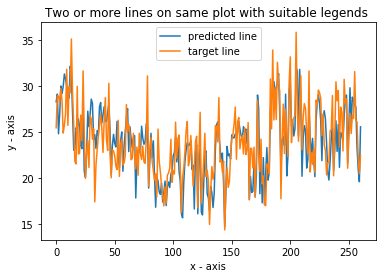

In [28]:
pred_line = preds.detach().numpy()
target_line =  target_tensor.detach().numpy()
plt.plot(pred_line,  label = "predicted line")
plt.plot(target_line,  label = "target line")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()